In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
import random
import cv2
from tqdm import tqdm
import dgl
import networkx as nx
from torch.utils.data import DataLoader
from torchvision.datasets import STL10,VOCSegmentation
from torchvision import transforms
import torchvision.transforms.functional as F
from torchvision.io import read_image
import matplotlib.pyplot as plt

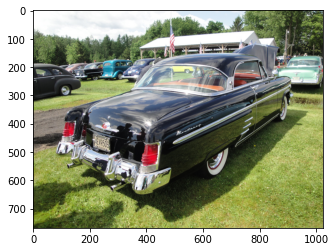

In [2]:
image=read_image('../data/OIV6/Car/data/000efa99e67d6f0c.jpg')
plt.imshow(image.permute(1,2,0))
plt.show()

c:\Users\kisim\anaconda3\envs\GNN_DGL\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


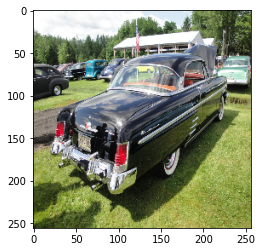

In [3]:
img=F.resize(image,size=(256,256))
plt.imshow(img.permute(1,2,0))
plt.show()

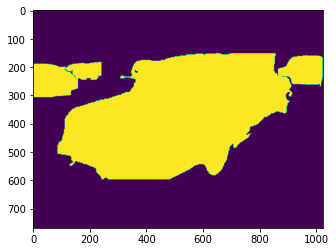

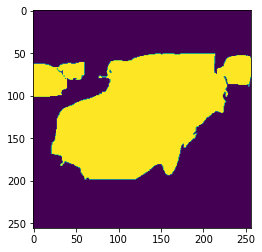

In [4]:
segment_image=read_image('../data/OIV6/Car/labels/000efa99e67d6f0c.png')
plt.imshow(segment_image.permute(1,2,0))
plt.show()
segment_img=F.resize(segment_image,size=(256,256))
plt.imshow(segment_img.permute(1,2,0))
plt.show()

In [5]:
out,cnt=torch.unique(segment_img,return_counts=True)
print(out)
print(cnt)

tensor([  0, 128, 255], dtype=torch.uint8)
tensor([41645,   145, 23746])


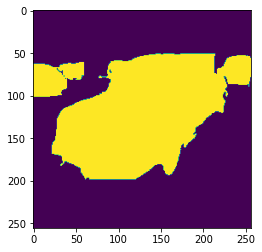

In [5]:
binari_image=(segment_img > 128).to(torch.uint8)*255
plt.imshow(binari_image.permute(1,2,0))
plt.show()

In [18]:
out,cnt=torch.unique(binari_image,return_counts=True)
print(out)
print(cnt)
print(f'{(cnt[1]/(256*256))*100}%')

tensor([  0, 255], dtype=torch.uint8)
tensor([41790, 23746])
36.2335205078125%


256
32


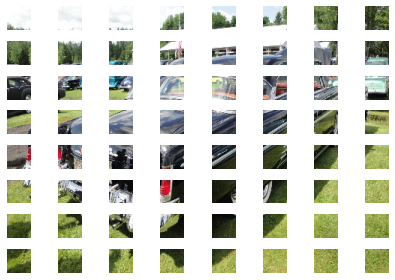

patch num: 64  patch pic size: 32


In [28]:
orig=img.detach().permute(1,2,0)
segorig=binari_image.detach().permute(1,2,0)
num_patch=8
size=orig.shape[0]
print(size)
patch_width=int(size/num_patch)
print(patch_width)
data=[]

for i in range(0,size,patch_width):
    #print(i)
    for j in range(0,size,patch_width):
        #print(j)
        data.append(orig[i: i + patch_width,j: j + patch_width, :])

#分割した各パッチを正方形に表示
# 1枚の図を作成
fig = plt.figure()

# 画像を追加
for i in range(num_patch**2):
    ax = fig.add_subplot(num_patch, num_patch, i+1)
    ax.imshow(data[i])
    ax.axis('off')

# 画像を表示
plt.tight_layout()
plt.show()
print(f'patch num: {num_patch**2}  patch pic size: {patch_width}')

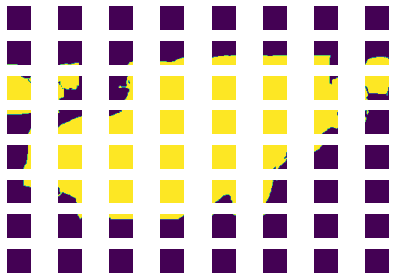

patch num: 8  patch pic size: 32


In [29]:
data=[]
for i in range(0,size,patch_width):
    #print(i)
    for j in range(0,size,patch_width):
        #print(j)
        data.append(segorig[i: i + patch_width,j: j + patch_width, :])

#分割した各パッチを正方形に表示
# 1枚の図を作成
fig = plt.figure()

# 画像を追加
for i in range(num_patch**2):
    ax = fig.add_subplot(num_patch, num_patch, i+1)
    ax.imshow(data[i],vmin=0,vmax=255)
    ax.axis('off')

# 画像を表示
plt.tight_layout()
plt.show()
print(f'patch num: {num_patch}  patch pic size: {patch_width}')

In [49]:
out,cnt=torch.unique(data[0],return_counts=True)
print(out)
print(cnt)
if len(out)==1:
    if out[0] == 0:
        print('0.0%')
    else:
        print('100.0%')
else:
    print(f'{(cnt[1]/(32*32))*100}%')

tensor([0], dtype=torch.uint8)
tensor([1024])
0.0%


In [50]:
start=time.time()
for d in data:
    out,cnt=torch.unique(d,return_counts=True)
    if len(out)==1:
        if out[0] == 0:
            print('0.0%')
        else:
            print('100.0%')
    else:
        print(f'{(cnt[1]/(32*32))*100}%')
print(f'time: {time.time() - start}')

0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
1.3671875%
4.39453125%
2.34375%
18.9453125%
37.79296875%
39.94140625%
26.953125%
29.19921875%
96.484375%
54.98046875%
25.68359375%
100.0%
100.0%
100.0%
94.23828125%
73.4375%
18.84765625%
55.46875%
91.30859375%
100.0%
100.0%
100.0%
86.71875%
2.34375%
17.578125%
100.0%
100.0%
100.0%
100.0%
90.4296875%
6.15234375%
0.0%
9.66796875%
73.2421875%
100.0%
100.0%
84.1796875%
31.8359375%
0.0%
0.0%
0.0%
2.734375%
21.484375%
19.921875%
0.87890625%
0.390625%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
time: 0.0110015869140625
